## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_data = mouse_metadata.merge(study_results, how='outer', on='Mouse ID')

# Display the data table for preview
merged_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.

# NOTE: there are 1893 rows but it seems every mouse should have a max of 10 rows
num_of_mice = len(merged_data['Mouse ID'].value_counts())
print(f'There are {num_of_mice} mice in this experiment.')


There are 249 mice in this experiment.


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

# NOTE: From looking at the data, each mouse has a max(?) of 10 data points, so any 
# mouse that has over that many means it probably has duplicated data
duplicate_data = merged_data.loc[merged_data['Mouse ID'] == 'g989','Timepoint']
duplicate_data


908     0
909     0
910     5
911     5
912    10
913    10
914    15
915    15
916    20
917    20
918    25
919    30
920    35
Name: Timepoint, dtype: int64

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

# NOTE: here we can see that subject g989 has some duplicated entries for 'Timepoint' and 'Tumor Volume' but there is 
# really only one row that is duplicated (because it has the same value for Tumor Volume), the rest have a different values
duplicate_data = merged_data.loc[merged_data['Mouse ID'] == 'g989']
duplicate_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_merge = merged_data.drop_duplicates(['Mouse ID','Timepoint'], keep='first')
cleaned_merge


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.

# NOTE: The number of mice have not changed, but now every mouse should have the correct 
# max amount of data points to look at, in this case it was only one subject
num_of_mice_clean = len(cleaned_merge['Mouse ID'].value_counts())
print(f'There are {num_of_mice_clean} mice in this experiment.')

There are 249 mice in this experiment.


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

regimen_data = cleaned_merge.groupby('Drug Regimen')

regimen_data_mean = regimen_data['Tumor Volume (mm3)'].mean()
regimen_data_median = regimen_data['Tumor Volume (mm3)'].median()
regimen_data_variance = regimen_data['Tumor Volume (mm3)'].var()
regimen_data_standardDeviation = regimen_data['Tumor Volume (mm3)'].std()
regimen_data_sem = regimen_data['Tumor Volume (mm3)'].sem()

regimen_summary = pd.DataFrame({
    'Mean' : regimen_data_mean,
    'Median' : regimen_data_median,
    'Variance' : regimen_data_variance,
    'StanDev' : regimen_data_standardDeviation,
    'SEM' : regimen_data_sem,
})

regimen_summary


,Mean,Median,Variance,StanDev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
cleaned_merge.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Total Number of Timepoints')

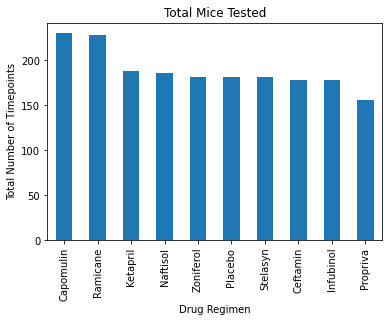

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

# NOTE: im not 100% sure what it is asking, my assumption is that if we get all the datapoints for each drug 
# that should be equivalent to the total number of timepoints for the mice. So a value_counts() for each drug should show us
# how many datapoints for each drug were done 
regimen_bar_data = cleaned_merge['Drug Regimen'].value_counts()
pandas_bar = regimen_bar_data.plot(kind='bar', title='Total Mice Tested')
pandas_bar.set_xlabel('Drug Regimen')
pandas_bar.set_ylabel('Total Number of Timepoints')


Text(0, 0.5, 'Total Number of Timepoints')

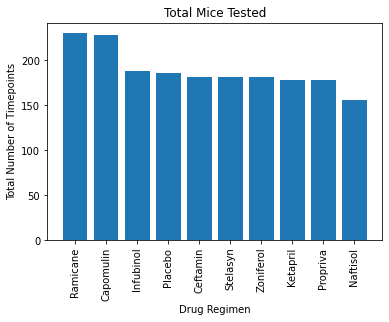

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
drug_names = cleaned_merge['Drug Regimen'].unique()
plt.bar(drug_names,regimen_bar_data)
plt.xticks(rotation=90)
plt.title('Total Mice Tested')                      
plt.xlabel('Drug Regimen')
plt.ylabel('Total Number of Timepoints')

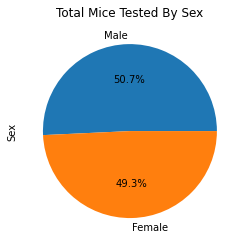

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pie_chart_data = cleaned_merge['Sex'].value_counts()
pandas_pie = pie_chart_data.plot(kind='pie', title='Total Mice Tested By Sex', autopct='%1.1f%%')

Text(0, 0.5, 'Sex')

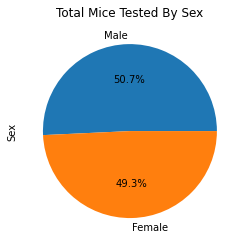

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(pie_chart_data, labels=['Male', 'Female'], autopct='%1.1f%%')
plt.title('Total Mice Tested By Sex')
plt.ylabel('Sex')


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
specific_drug_data = cleaned_merge
indexNames = cleaned_merge[ (cleaned_merge['Drug Regimen'] != 'Capomulin') & (cleaned_merge['Drug Regimen'] != 'Ramicane') & (cleaned_merge['Drug Regimen'] != 'Infubinol') & (cleaned_merge['Drug Regimen'] != 'Ceftamin') ].index
specific_drug_data.drop(indexNames , inplace=True)
specific_drug_data_max = specific_drug_data.groupby('Mouse ID').max()


C:\Users\bryan\anaconda3\envs\PythonData\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = specific_drug_data['Drug Regimen'].unique()

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = specific_drug_data_max['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[.25]
upperq = quartiles[.75]
iqr = upperq-lowerq
    
# Locate the rows which contain mice on each drug and get the tumor volumes   
tumor_vol_data = specific_drug_data_max['Tumor Volume (mm3)']

# Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

{'whiskers': [<matplotlib.lines.Line2D at 0x207128f6ba8>,
 'caps': [<matplotlib.lines.Line2D at 0x207129032b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x207128f6898>],
 'medians': [<matplotlib.lines.Line2D at 0x207129039b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x20712903d30>],
 'means': []}

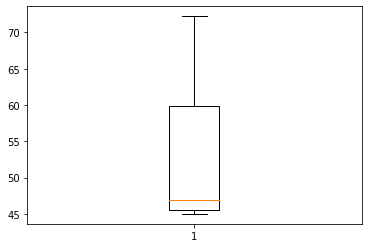

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.boxplot(tumor_vol_data)

## Line and Scatter Plots

Text(0.5, 1.0, 'Graph of Subject b128')

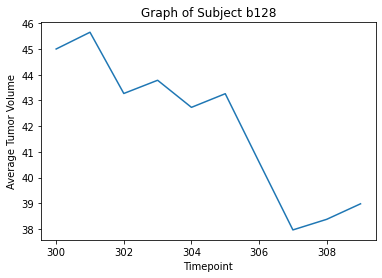

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_mouse = cleaned_merge.loc[cleaned_merge['Mouse ID'] == 'b128']
plt.plot(capomulin_mouse['Tumor Volume (mm3)'])
plt.xlabel('Timepoint')
plt.ylabel('Average Tumor Volume')
plt.title('Graph of Subject b128')

ipykernel_launcher:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


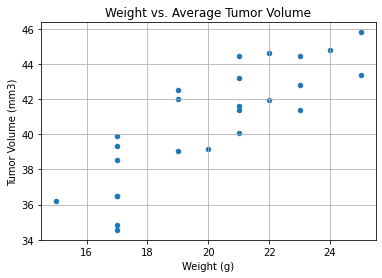

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_data = cleaned_merge.loc[cleaned_merge['Drug Regimen'] == 'Capomulin']
grouped_capomulin_data = pd.DataFrame(capomulin_data.groupby('Mouse ID')['Weight (g)', 'Tumor Volume (mm3)'].mean().reset_index())
grouped_capomulin_data.plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)', grid=True, title='Weight vs. Average Tumor Volume')

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model
# for mouse weight and average tumor volume for the Capomulin regimen
weight = grouped_capomulin_data.iloc[:,1]
avg_volume = grouped_capomulin_data.iloc[:,2]
correlation = round(st.pearsonr(weight, avg_volume)[0],2)
print(f'The correlation between weight and average volume is {correlation}')


The correlation between weight and average volume is 0.84


Text(0.5, 1.0, 'Weight vs. Average Tumor Volume')

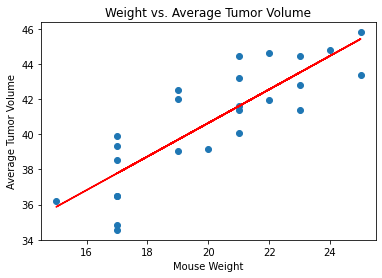

In [19]:
# Plot the linear model
plt.scatter(weight, avg_volume)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight, avg_volume)
fit = slope * weight + intercept
plt.plot(weight,fit,'r-')
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume")
plt.title('Weight vs. Average Tumor Volume')
